# resumen 
vamos a utilizar un dataset con texto y nuestro objetivo sera clasifcarlo en 46 categorias, por lo cual es un problema de clasificacion complejo. 
utilizarmeos un diccionario de solo 10,000 palabras, y cada texto contendra solo 87

## Importando librerías

In [24]:
from keras.datasets import reuters
from keras import layers, models
import numpy as np
from tqdm .keras import TqdmCallback

## Descarguemos datos

In [2]:
# indicamos que queremos un diccionario de 10,000 palabras, osea en todo el dataset solo existiran 10,000 palabras diferentes
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 2s 1us/step


### Diccionario de palabras

In [3]:
word_index = reuters.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])

550378/550378 [==============================] - 1s 2us/step


In [4]:
for _ in train_data[0][5:10]:
    print(word_index.get( _ - 3))

a
result
of
its
december


### Función de vectorizar 

In [5]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1 # colocara un 1 en el indice que corresponda al numero del 0 al 10,000
    return restults     

## Transformando los datos

In [6]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

en la siguiente celda entenderemos como era el X inical y como lo transformamos a formato vectorial que es parecido al hot encoding (ya que aqui hay un 1 en el inidce correspondiente al diccionario de palabras)

In [13]:
print(train_data.shape) 
print(len(train_data[0])) # numero de palabras por registro
print(train_data[0][10:30])

print(x_train.shape)
print(x_train[0].shape) # ahora tenemos cada registro en un formato vectorizado que se parece al hot encoding 
print(x_train[0][10:30])

(8982,)
87
[270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67]
(8982, 10000)
(10000,)
[1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]


In [15]:
from keras.utils.np_utils import to_categorical

In [16]:

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


en la siguiente celda entenderemos como era el Y inical y como lo transformamos a formato one hot encoding 

In [36]:
print(train_labels[0])
print(y_train[0])
print(len(y_train[0])) # tensmo 46 categorias !!!

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
46


### Creando la red

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', # esta funcion evalua outputs en formato one hot encoding
              metrics=['acc']   
             )

In [22]:
# hacemos el split de entrenamiento y de validacion 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train =  y_train[1000:]

### Entrenando el modelo

In [29]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val,y_val),
                   verbose=0, 
                   callbacks= [TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

### Validamos resultados

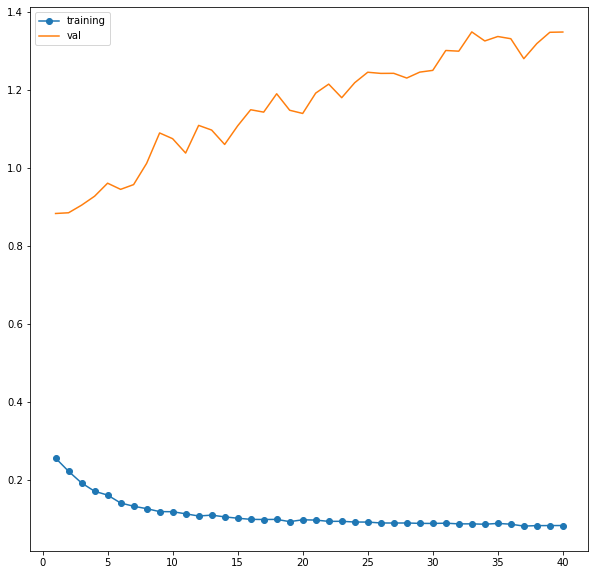

In [30]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o-',label='training')
plt.plot(epoch,val_loss_values, '-',label='val')
plt.legend()
plt.show()

In [31]:
model.evaluate(x_test, y_test) # nos regresa un vector con [loss, acc]

71/71 [==============================] - 0s 3ms/step - loss: 1.5740 - acc: 0.7756


[1.5739575624465942, 0.7756010890007019]

In [32]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [35]:
#np.sum(predictions[0])
#np.argmax([2,5,65,3,6,7])
np.argmax(predictions[0])

3